<a href="https://colab.research.google.com/github/deepluckyperson/sber_homework/blob/main/%D0%94%D0%97_20_01_2_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
#импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings("ignore")

#from google.colab import drive
#drive.mount('/content/drive')

In [25]:
#подключение google drive
#from google.colab import drive
#drive.mount('/content/drive')

In [26]:
#чтение датасета
url = 'https://github.com/deepluckyperson/sber_homework/blob/main/ThoraricSurgery.csv?raw=true'
df = pd.read_csv(url)
df

,id,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,1,DGN2,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60,F
1,2,DGN3,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F
2,3,DGN3,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59,F
3,4,DGN3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54,F
4,5,DGN3,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,73,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,466,DGN2,3.88,2.12,PRZ1,F,F,F,T,F,OC13,F,F,F,T,F,63,F
466,467,DGN3,3.76,3.12,PRZ0,F,F,F,F,F,OC11,F,F,F,T,F,61,F
467,468,DGN3,3.04,2.08,PRZ1,F,F,F,T,F,OC13,F,F,F,F,F,52,F
468,469,DGN3,1.96,1.68,PRZ1,F,F,F,T,T,OC12,F,F,F,T,F,79,F


In [27]:
#Проверка на null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       470 non-null    int64  
 1   DGN      470 non-null    object 
 2   PRE4     470 non-null    float64
 3   PRE5     470 non-null    float64
 4   PRE6     470 non-null    object 
 5   PRE7     470 non-null    object 
 6   PRE8     470 non-null    object 
 7   PRE9     470 non-null    object 
 8   PRE10    470 non-null    object 
 9   PRE11    470 non-null    object 
 10  PRE14    470 non-null    object 
 11  PRE17    470 non-null    object 
 12  PRE19    470 non-null    object 
 13  PRE25    470 non-null    object 
 14  PRE30    470 non-null    object 
 15  PRE32    470 non-null    object 
 16  AGE      470 non-null    int64  
 17  Risk1Yr  470 non-null    object 
dtypes: float64(2), int64(2), object(14)
memory usage: 66.2+ KB


In [28]:
#дропаем ненужные колонки
df = df.drop(['id'], axis = 1)
df

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,DGN2,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60,F
1,DGN3,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F
2,DGN3,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59,F
3,DGN3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54,F
4,DGN3,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,73,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,DGN2,3.88,2.12,PRZ1,F,F,F,T,F,OC13,F,F,F,T,F,63,F
466,DGN3,3.76,3.12,PRZ0,F,F,F,F,F,OC11,F,F,F,T,F,61,F
467,DGN3,3.04,2.08,PRZ1,F,F,F,T,F,OC13,F,F,F,F,F,52,F
468,DGN3,1.96,1.68,PRZ1,F,F,F,T,T,OC12,F,F,F,T,F,79,F


DGN3    349
DGN2     52
DGN4     47
DGN5     15
DGN6      4
DGN8      2
DGN1      1
Name: DGN, dtype: int64


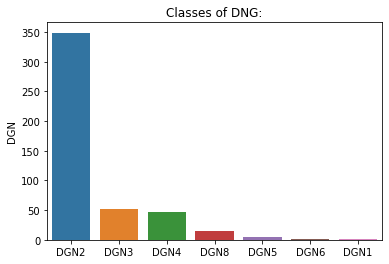

In [29]:
#отрисовываем график распределения целевого признака
print(df.DGN.value_counts())
plt.title('Classes of DNG:')
sns.barplot(x=df.DGN.unique(),y=df.DGN.value_counts());

In [30]:
#пишем функцию кодировки объектных признаков
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

def encoding(data):
  df_enc = data
  for i in df_enc.columns:
    if df_enc.dtypes[i] == np.object:
      df_enc[i] = enc.fit_transform(df_enc[i])
  return df_enc

In [31]:
#кодировка
encoding(df) 
df

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,1,2.88,2.16,1,0,0,0,1,1,3,0,0,0,1,0,60,0
1,2,3.40,1.88,0,0,0,0,0,0,1,0,0,0,1,0,51,0
2,2,2.76,2.08,1,0,0,0,1,0,0,0,0,0,1,0,59,0
3,2,3.68,3.04,0,0,0,0,0,0,0,0,0,0,0,0,54,0
4,2,2.44,0.96,2,0,1,0,1,1,0,0,0,0,1,0,73,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,1,3.88,2.12,1,0,0,0,1,0,2,0,0,0,1,0,63,0
466,2,3.76,3.12,0,0,0,0,0,0,0,0,0,0,1,0,61,0
467,2,3.04,2.08,1,0,0,0,1,0,2,0,0,0,0,0,52,0
468,2,1.96,1.68,1,0,0,0,1,1,1,0,0,0,1,0,79,0


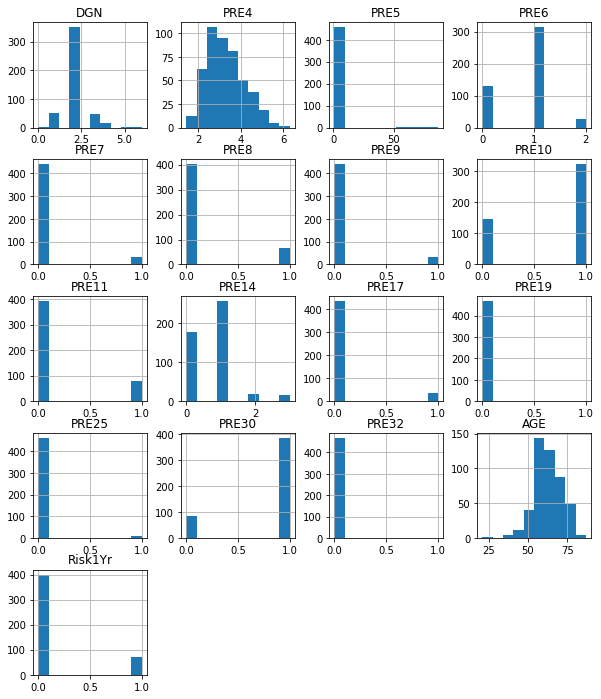

In [32]:
#график распределения признаков
df.hist(figsize=(10,12));

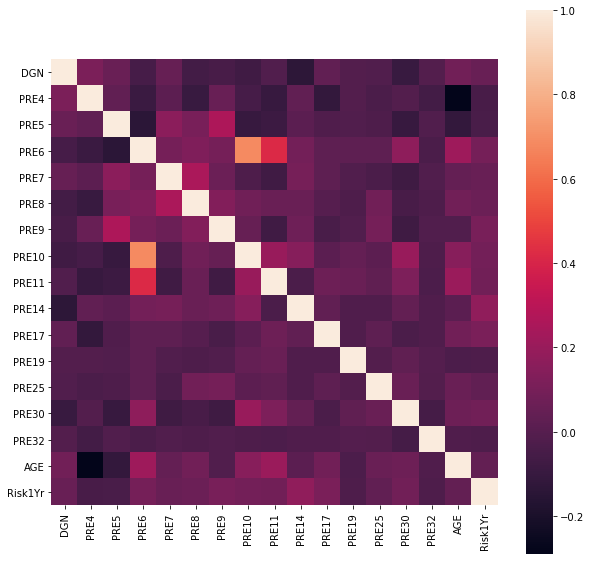

In [33]:
#проверка на наличие шума
plt.subplots(figsize = (10,10))
sns.heatmap(df.corr(), square=True)
plt.show()

In [34]:
#разбиваем датасет на матрицу признаков и целевую переменную
X = df.drop(['DGN'], axis=1)
y = df['DGN']

In [35]:
#создаем функцию на добавление признаков
from sklearn.preprocessing import PolynomialFeatures

def poly(a):
  b = PolynomialFeatures(2).fit_transform(a)
  return b  

In [36]:
#добавляем полиномиальные признаки
X_poly = poly(X)
X_poly

array([[1.000e+00, 2.880e+00, 2.160e+00, ..., 3.600e+03, 0.000e+00,
        0.000e+00],
       [1.000e+00, 3.400e+00, 1.880e+00, ..., 2.601e+03, 0.000e+00,
        0.000e+00],
       [1.000e+00, 2.760e+00, 2.080e+00, ..., 3.481e+03, 0.000e+00,
        0.000e+00],
       ...,
       [1.000e+00, 3.040e+00, 2.080e+00, ..., 2.704e+03, 0.000e+00,
        0.000e+00],
       [1.000e+00, 1.960e+00, 1.680e+00, ..., 6.241e+03, 0.000e+00,
        0.000e+00],
       [1.000e+00, 4.720e+00, 3.560e+00, ..., 2.601e+03, 0.000e+00,
        0.000e+00]])

In [37]:
#создаем функцию для аугментации данных
from imblearn.over_sampling import RandomOverSampler
def ROS(a, b):
  n = df.DGN.unique()
  for i in n:
    a, b = RandomOverSampler(sampling_strategy='minority').fit_resample(np.array(a), np.array(b))
  return a, b

In [38]:
#делаем аугментацию
X_poly_OV, y_OV = ROS(X_poly, y)

In [39]:
X_poly_OV.shape, y_OV.shape

((2443, 153), (2443,))

In [40]:
#нормализация
from sklearn.preprocessing import scale
X_poly_OV_scaled = scale(np.array(X_poly_OV))
X_poly_OV_scaled

array([[ 0.        , -0.91748128, -0.23607364, ..., -0.34755437,
        -0.51194874, -0.5200104 ],
       [ 0.        , -0.35104035, -0.25761852, ..., -1.21814166,
        -0.51194874, -0.5200104 ],
       [ 0.        , -1.04819842, -0.24222932, ..., -0.45125796,
        -0.51194874, -0.5200104 ],
       ...,
       [ 0.        , -1.00462604, -0.2791634 , ..., -1.03687824,
         1.54920209,  1.92303846],
       [ 0.        , -0.83033652, -0.22991796, ..., -0.65343639,
         1.70476064,  1.92303846],
       [ 0.        , -0.91748128, -0.2329958 , ..., -0.13491844,
        -0.51194874, -0.5200104 ]])

In [41]:
#делим на train и test
from sklearn.model_selection import train_test_split
X_poly_OV_scaled_train, X_poly_OV_scaled_test, y_OV_train, y_OV_test = train_test_split(X_poly_OV_scaled, y_OV, test_size=0.2)

In [42]:
#импортируем необходимы модели обучения
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

knn = KNeighborsClassifier()
svc = SVC()
log = LogisticRegression()

#создаем функцию для поиска гиперпараметра
from sklearn.model_selection import RandomizedSearchCV

knn_p = {'n_neighbors':np.array(np.linspace(0, 200, 200), dtype='int')}
svc_p = {'C':np.logspace(-5, 5, 100), 'kernel':['linear', 'poly', 'rbf', 'sigmoid']}
log_p = {'C':np.logspace(-5, 5, 100), 'penalty':['l1', 'l2']}

knn_rc = RandomizedSearchCV(knn, knn_p, cv=5)
svc_rc = RandomizedSearchCV(svc, svc_p, cv=5, n_jobs=5)
log_rc = RandomizedSearchCV(log, log_p, cv=5, n_jobs=5)

In [43]:
#определение гиперпараметра для kNN
knn_new = knn_rc.fit(X_poly_OV_scaled,y_OV)

In [44]:
knn_rc.best_score_, knn_rc.best_params_

(0.8964397063260586, {'n_neighbors': 6})

In [45]:
#применяем гиперпараметр
knn_new = KNeighborsClassifier(n_neighbors=35)

In [46]:
#обучаем модель kNN и получаем предсказание
model_knn = knn_new.fit(X_poly_OV_scaled_train, y_OV_train).predict(X_poly_OV_scaled_test)

In [47]:
#смотрим метрики kNN
from sklearn import metrics

print(metrics.classification_report(y_OV_test, model_knn))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        67
           1       0.56      0.49      0.52        69
           2       0.58      0.26      0.36        68
           3       0.50      0.45      0.47        67
           4       0.63      0.90      0.74        67
           5       0.88      1.00      0.94        80
           6       0.96      1.00      0.98        71

    accuracy                           0.74       489
   macro avg       0.71      0.73      0.71       489
weighted avg       0.72      0.74      0.71       489



In [ ]:
#определение гиперпараметра для SVC
svc_new = svc_rc.fit(X_poly_OV_scaled,y_OV)

In [ ]:
svc_rc.best_score_, svc_rc.best_params_

In [ ]:
#применяем гиперпараметр
svc_new = SVC(C=0.027185882427329403, kernel = 'linear')

In [ ]:
#обучаем модель SVC и получаем предсказание
model_svc = svc_new.fit(X_poly_OV_scaled_train, y_OV_train).predict(X_poly_OV_scaled_test)

In [ ]:
#смотрим метрики SVC
print(metrics.classification_report(y_OV_test, model_svc))

In [ ]:
#определение гиперпараметра для Логистической Регрессии
log_new = log_rc.fit(X_poly_OV_scaled,y_OV)

In [ ]:
log_rc.best_score_, log_rc.best_params_

In [ ]:
#применяем гиперпараметр
log_new = LogisticRegression(C=19630.406500402685, penalty = 'l2')

In [ ]:
#обучаем модель Логистической Регрессии и получаем предсказание
model_log = log_new.fit(X_poly_OV_scaled_train, y_OV_train).predict(X_poly_OV_scaled_test)

In [ ]:
#смотрим метрики Логистической Регрессии
print(metrics.classification_report(y_OV_test, model_log))